Explain what Network X is and is used for in this project--

In [2]:
#Load and inspect the first 5 rows of the edges for season 1
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
Lannisters = ['TYRION','TYWIN','CERSEI','JAIME']
Starks = ['NED', 'CATELYN', 'ROBB','JON','SANSA','ARYA']
Main_Char = Lannisters + Starks


S1 = pd.read_csv('gameofthrones/data/got-s1-edges.csv')
S1.head(5)

,Source,Target,Weight,Season
0,NED,ROBERT,192,1
1,DAENERYS,JORAH,154,1
2,JON,SAM,121,1
3,LITTLEFINGER,NED,107,1
4,NED,VARYS,96,1


----

In [3]:
# Create a graph object and iterate throw the rows of the season 1 dataframe to add edges to graph
G_S1 = nx.Graph()

for _ , edge in S1.iterrows():
    G_S1.add_edge(edge['Source'], edge['Target'] , weight=edge['Weight'], season='1')
G_S1


The measure of degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has), this number can be normalized using all possible links. The degree centrality in the domain of Game of Thrones is the number of connections a character has compared to all possible connections in the story. 

In networkx we use the degree_centrality() function to find our the degree centrality of the nodes in a graph. The output of the degree_centrality() function is a dictionary with the nodes (characters) as the keys and thier corrisponding number of nodes connected to them / number of all nodes. This value is expressed as a number between 0 and 1. 

--explain findings

[('NED', 0.45238095238095233), ('TYRION', 0.32539682539682535), ('CATELYN', 0.2936507936507936), ('ROBERT', 0.2857142857142857), ('ROBB', 0.23809523809523808), ('CERSEI', 0.23015873015873015), ('ARYA', 0.2222222222222222), ('JOFFREY', 0.21428571428571427), ('JON', 0.20634920634920634), ('LITTLEFINGER', 0.20634920634920634)]


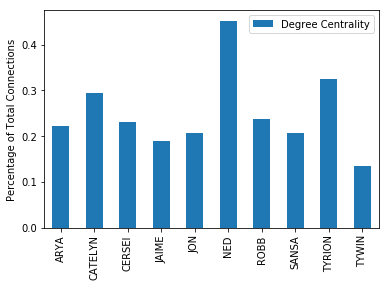

In [4]:
# Delete???
# Find the most important characters by degree centrality
degree_cent_S1 = nx.degree_centrality(G_S1)
sort_degree_cent_1 =dict(sorted(degree_cent_S1.items(), key=lambda x:x[1],reverse=True ))
print(list(sort_degree_cent_1.items())[0:10])
df_sort_deg1 = pd.DataFrame.from_records([sort_degree_cent_1]).rename({0:'Degree Centrality'})

df_sort_deg1_main = df_sort_deg1.T[df_sort_deg1.T.index.isin(Main_Char)]
df_sort_deg1_main.plot(kind='bar')
plt.ylabel('Percentage of Total Connections')
plt.show()


---Explain Betweeness centrality

 Do you help to connect different parts of the networks?
 
 Betweenness Centrality

Betweenness centrality identifies nodes that are strategically positioned in the network, meaning that information will often travel through that person. Such an intermediary position gives that person power and influence. Betweenness centrality is a raw count of the number of short paths that go through a given node. For example, if a node is located on a bottleneck between two large communities, then it will have high betweenness.
 
 
 

[('NED', 0.30026126167071343), ('TYRION', 0.16145976276685722), ('CATELYN', 0.13227954417579132), ('ROBERT', 0.10930923572913841), ('DAENERYS', 0.10138740461169886), ('JON', 0.08544308870643987), ('ROBB', 0.07916384377204937), ('ARYA', 0.06561452566372701), ('PYP', 0.06026418443633793), ('JORAH', 0.053181703315620846)]


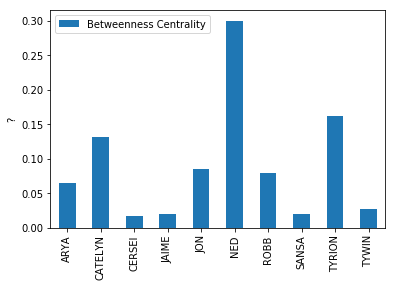

In [5]:
# Delete??

bet_cent_S1 = nx.betweenness_centrality(G_S1 , weight='Weight')
sort_bet_cent_1 =dict(sorted(bet_cent_S1.items(), key=lambda x:x[1],reverse=True ))
print(list(sort_bet_cent_1.items())[0:10])
df_sort_bet1 = pd.DataFrame.from_records([sort_bet_cent_1]).rename({0:'Betweenness Centrality'})
df_sort_bet_main = df_sort_bet1.T[df_sort_bet1.T.index.isin(Main_Char)]
df_sort_bet_main.plot(kind='bar')
plt.ylabel('?')
plt.show()


--Explain Eigenvector Centrality

Do you have many connections to important people?

Eigenvector Centrality

This is weighted degree centrality with a feedback loop. Having connections to “important” people makes you more important as well. In this measure, you get full credit for knowing someone important, even if you don’t know them very well. This measures how powerful your network is (in theory), regardless of whether you are using your network to its fullest potential.


[('NED', 0.31498447895647114), ('ROBERT', 0.24812123326232996), ('CERSEI', 0.2391948327808419), ('CATELYN', 0.2374853669378773), ('TYRION', 0.22972317989624752), ('JOFFREY', 0.21947138769356012), ('ARYA', 0.20713039957330018), ('ROBB', 0.20707831129215076), ('LITTLEFINGER', 0.2046629857551136), ('SANSA', 0.20258680392370262)]


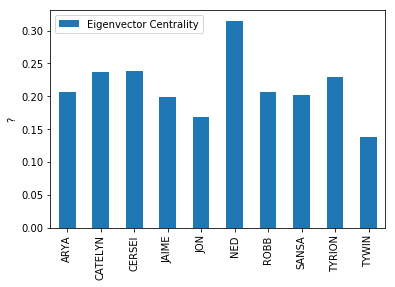

In [6]:
# Delete??
ec_S1 = nx.eigenvector_centrality(G_S1 , weight='Weight')
sort_ec_cent_1 =dict(sorted(ec_S1.items(), key=lambda x:x[1],reverse=True ))
print(list(sort_ec_cent_1.items())[0:10])
df_sort_ec1 = pd.DataFrame.from_records([sort_ec_cent_1]).rename({0:'Eigenvector Centrality'})
df_sort_ec1_main = df_sort_ec1.T[df_sort_ec1.T.index.isin(Main_Char)]
df_sort_ec1_main.plot(kind='bar')
plt.ylabel('?')
plt.show()


61.0


/home/adam/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


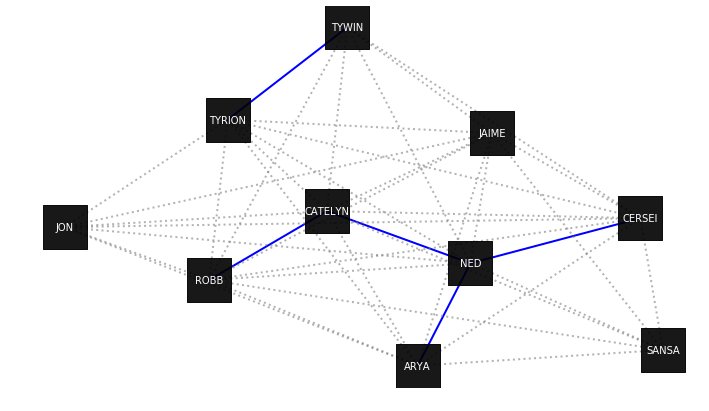

[('ARYA', 'NED', {'weight': 90, 'season': '1'}),
 ('ARYA', 'SANSA', {'weight': 53, 'season': '1'}),
 ('ARYA', 'JON', {'weight': 20, 'season': '1'}),
 ('ARYA', 'CERSEI', {'weight': 9, 'season': '1'}),
 ('ARYA', 'CATELYN', {'weight': 7, 'season': '1'}),
 ('ARYA', 'ROBB', {'weight': 6, 'season': '1'}),
 ('ARYA', 'JAIME', {'weight': 3, 'season': '1'}),
 ('ARYA', 'TYRION', {'weight': 2, 'season': '1'}),
 ('SANSA', 'NED', {'weight': 49, 'season': '1'}),
 ('SANSA', 'CERSEI', {'weight': 36, 'season': '1'}),
 ('SANSA', 'CATELYN', {'weight': 14, 'season': '1'}),
 ('SANSA', 'ROBB', {'weight': 9, 'season': '1'}),
 ('SANSA', 'JAIME', {'weight': 2, 'season': '1'}),
 ('JON', 'TYRION', {'weight': 45, 'season': '1'}),
 ('JON', 'NED', {'weight': 29, 'season': '1'}),
 ('JON', 'ROBB', {'weight': 25, 'season': '1'}),
 ('JON', 'CATELYN', {'weight': 14, 'season': '1'}),
 ('JON', 'JAIME', {'weight': 10, 'season': '1'}),
 ('JON', 'CERSEI', {'weight': 3, 'season': '1'}),
 ('TYRION', 'TYWIN', {'weight': 61, 'sea

In [7]:
H = G_S1.subgraph(Main_Char)
def checkInteract(s , t):
    if s in Starks and t in Starks:
        return 0
    elif s in Lannisters and t in Lannisters:
        return 1
    else:
        return 3
#color =['b' if checkInteract(s,t)==0 else 'r' if checkInteract(s,t)==1 else 'y' for (s,t) in H.edges()]
pos = nx.spring_layout(H, scale=3)
max_weight = max(dict(H.edges).values() , key=lambda x: x['weight'])['weight']
weights = np.array([(H[u][v]['weight']) for u,v in H.edges()])
p95 = np.floor(np.percentile(weights , 90))
print(p95)
#for u,v,d in H.edges(data=True):
     #print(u , v, d)
    
plt.figure(figsize=(12,7))
nx.draw_networkx_nodes(H, pos, node_size=2000, node_shape='s', alpha=.9, node_color='black')
elarge = [(u, v) for (u, v, d) in H.edges(data=True) if d['weight'] >=p95]
emedium = [(u, v) for (u, v, d) in H.edges(data=True) if d['weight'] <p95]
nx.draw_networkx_edges(H, pos, edgelist=elarge,width=2 , alpha=1 , edge_color='b')
nx.draw_networkx_edges(H, pos, edgelist=emedium,width=2, alpha=.6, edge_color='grey', style='dotted')
nx.draw_networkx_labels(H, pos, font_size=10, font_color='w')
plt.axis('off')
plt.show()
[(u,v,d) for (u, v, d) in H.edges(data=True)]

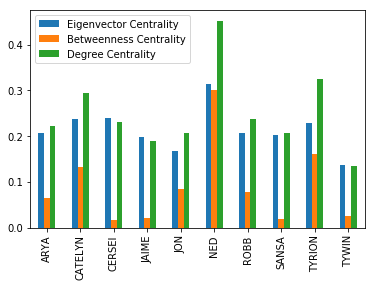

In [8]:
#df_info = pd.DataFrame(df_sort_ec1_main, df_sort_bet_main, df_sort_deg1_main)
#df_info
df_info = pd.concat([df_sort_ec1_main, df_sort_bet_main, df_sort_deg1_main], axis=1)
df_info.plot(kind='bar')

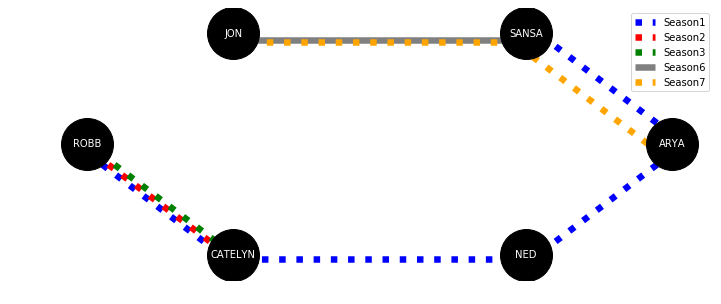

[[('ARYA', 'SANSA'), ('ARYA', 'NED'), ('ROBB', 'CATELYN'), ('CATELYN', 'NED')],
 [('ROBB', 'CATELYN')],
 [('ROBB', 'CATELYN')],
 [],
 [],
 [('SANSA', 'JON')],
 [('ARYA', 'SANSA'), ('SANSA', 'JON')]]

In [26]:
Slist= ['gameofthrones/data/got-s1-edges.csv','gameofthrones/data/got-s2-edges.csv', 'gameofthrones/data/got-s3-edges.csv','gameofthrones/data/got-s4-edges.csv', 
 'gameofthrones/data/got-s5-edges.csv', 'gameofthrones/data/got-s6-edges.csv', 'gameofthrones/data/got-s7-edges.csv']
S2 = pd.read_csv('gameofthrones/data/got-s2-edges.csv')
S2.head(5)
G_S2 = nx.Graph()
Glist = []
s_num = 1
for season in Slist:
   
    S = pd.read_csv(season)
    G = nx.Graph()
    
    for _ , edge in S.iterrows():
        G.add_edge(edge['Source'], edge['Target'] , weight=edge['Weight'] , season=str(s_num))
    Glist.append(G)
    s_num+=1

mg = nx.MultiGraph()
#mg.add_weighted_edges_from(Glist[0].edges(data=True))
#b4 = len(mg.edges)
#mg.add_weighted_edges_from(Glist[1].edges(data=True))
#mg.add_weighted_edges_from(Glist[2].edges(data=True))

for i in range(7):
    mg.add_weighted_edges_from(Glist[i].edges(data=True))

sub = mg.subgraph(Starks)
weights1to7 = np.array([(d['weight']['weight']) for u,v,d in sub.edges(data=True)])
p95 = np.floor(np.percentile(weights1to7 , 90))
#print(p95)
Poslist= []
scale=1
for i in range(7):
    posN = nx.shell_layout(sub, scale=scale)
    Poslist.append(posN)
    scale-=.02
    #print(scale)
    
#pos2 = nx.shell_layout(sub, scale=1.1)
#pos3 = nx.shell_layout(sub, scale=1.2)


plt.figure(figsize=(12,5))
nx.draw_networkx_nodes(sub, Poslist[2], node_size=2700, node_shape='o', apha=.9, node_color='black')
nx.draw_networkx_labels(sub, Poslist[2], font_size=10, font_color='w')
large=[]
for i in range(7):
        elarge = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']==str(i+1)]
        large.append(elarge)
#print(large)
#elarge1 = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']=='1']
#elarge2 = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']=='2']
#elarge3 = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']=='3']
cs = [('b','dotted'),('r','dotted') ,( 'g','dotted'), ('y','dashed'), ('pink','dashed') , ('grey','solid'),('orange','dotted')]
for i in range(7):
    nx.draw_networkx_edges(sub, Poslist[i], edgelist=large[i],width=6.5, alpha=1 ,label='Season'+str(i+1), edge_color=cs[i][0], style=cs[i][1])
#nx.draw_networkx_edges(sub, pos2, edgelist=large[1],width=3, alpha=1, edge_color='y', style='dotted')
#nx.draw_networkx_edges(sub, pos3, edgelist=large[2],width=3, alpha=1, edge_color='g', style='dashed')
plt.legend()

plt.axis('off')
plt.show()

#[(u, v,d) for (u, v, d) in sub.edges(data=True) if d['weight']['season']=='3']
#[(u,v,d) for u,v,d in sub.edges(data=True)]
large

We defined important relationships to be any relationship between 2 characters that has as a frequency of interactions equal to the range in the top 10% of the range of all relationship interactions involving all 7 seasons. In this graph only the important relationships are shown for all seasons, however, because the seaosons are not garuanteed to contain a relationship that has an interaction amount in the top 10% range some seasons may be missing. 

The blue line shows us the flow of important(highly frequent) relationships in season 1. The first thing you notice is what every Stark but Jon is connected. This further emphasizes Jon's role as a loner that has no important relationships with his family in season 1. Another observation is how exactly the other Starks are conncted by the blue line. Besides the parents connection with each other , Ned is connected only to Arya and Catelyn is connected only to Robb. And of the children , only Arya and Sansa are connected. So Ned does not interact to a high degree with Sansa or Robb, and Cateyln does not interact to a high degree with Arya or Sansa. If we cross refference this with the actual locations of the characters in season 1 Cateyln's lack of important relationships with Sansa and Arya make sense as they are often in Kings Landing, while she is traveling around Westeros as a whole. Ned similarly is always in Kings landing so talking to Robb is out of the question. However , Ned and Sansa are in the same location so the lack of a connection is telling on Ned's prefference for Arya. 

The red line shows us the flow of important (highly frequent) relationships in season 2. As we can see the number of important connections drastically reduced in season 2 from 4 to just 1. This one is between Catelyn and Robb. Season 2 is when the war of the 5 kings started after Ned's death , and as far as the tarks are concerned it mainly focused on the North led by Robb. 

We skip seasons 4 and 5. It is presummed that these seasons were more about the Lannisters, but we would have to analyze the Lannisters first.  The grey line shows us the flow of important (highly frequent) realtionships in season 6. Once again the number of connections is only 1, which is Jon and Sansa. This can be explained as this is when in the story both character's story converges. The moment is also worth focusing on because it is the first time Jon ever connected on the graph with any other Stark, which symbolizes in the story Jon's growth from a black sheep to a part of the Stark herd. 

Lastly the yellow line shows us the flow of important (highly frequent) relationships in season 7. Once again there is a connection between Jon and Sansa , but now Arya has come home as well. It is important to note that Arya does not connect with Jon. Truthfully , Arya's character journey is more about her contrast with Sansa, and it is poetic that seasoon 7 mirrors season 1 for them. From season 1 to season 7 , the narrative focus on the Starks transitions from Parent-Parent , to Parent-Child and eventually from Sibling-Sibling. As this transition happened the connections traveled slowly reaching Jon. 


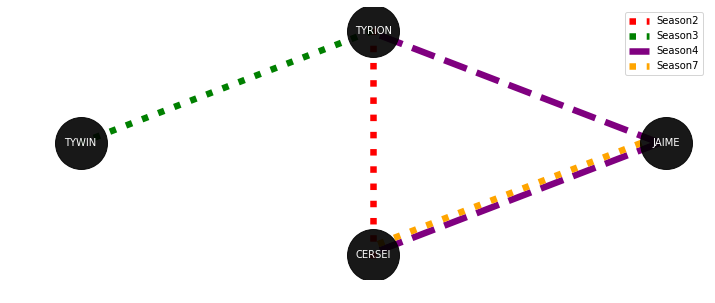

[[],
 [('TYRION', 'CERSEI')],
 [('TYRION', 'TYWIN')],
 [('JAIME', 'TYRION'), ('JAIME', 'CERSEI')],
 [],
 [],
 [('JAIME', 'CERSEI')]]

In [28]:
sub2 = mg.subgraph(Lannisters)
weights2_1to7 = np.array([(d['weight']['weight']) for u,v,d in sub2.edges(data=True)])
p2_95 = np.floor(np.percentile(weights2_1to7 , 90))
#print(p95)
Poslist2= []
scale2=1
for i in range(7):
    posN2 = nx.shell_layout(sub2, scale=scale2)
    Poslist2.append(posN2)
    scale2-=.02
    #print(scale)
    
#pos2 = nx.shell_layout(sub, scale=1.1)
#pos3 = nx.shell_layout(sub, scale=1.2)


plt.figure(figsize=(12,5))
nx.draw_networkx_nodes(sub2, Poslist2[2], node_size=2700, node_shape='o', alpha=.9, node_color='black')
nx.draw_networkx_labels(sub2, Poslist2[2], font_size=10, font_color='w')
large2=[]
for i in range(7):
        elarge2 = [(u, v) for (u, v, d) in sub2.edges(data=True) if d['weight']['weight'] >=p2_95 and d['weight']['season']==str(i+1)]
        large2.append(elarge2)
#print(large)
#elarge1 = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']=='1']
#elarge2 = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']=='2']
#elarge3 = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']=='3']
cs = [('b','dotted'),('r','dotted') ,( 'g','dotted'), ('purple','dashed'), ('pink','dashed') , ('grey','solid'),('orange','dotted')]
for i in range(7):
    nx.draw_networkx_edges(sub2, Poslist2[i], edgelist=large2[i],width=6.5, alpha=1 ,label='Season'+str(i+1), edge_color=cs[i][0], style=cs[i][1])
#nx.draw_networkx_edges(sub, pos2, edgelist=large[1],width=3, alpha=1, edge_color='y', style='dotted')
#nx.draw_networkx_edges(sub, pos3, edgelist=large[2],width=3, alpha=1, edge_color='g', style='dashed')
plt.legend()

plt.axis('off')
plt.show()
large2

[('CERSEI', 'NED')]
[('ARYA', 'TYWIN'), ('SANSA', 'CERSEI')]
[('SANSA', 'TYRION')]
[]
[]
[]
[('JON', 'TYRION')]


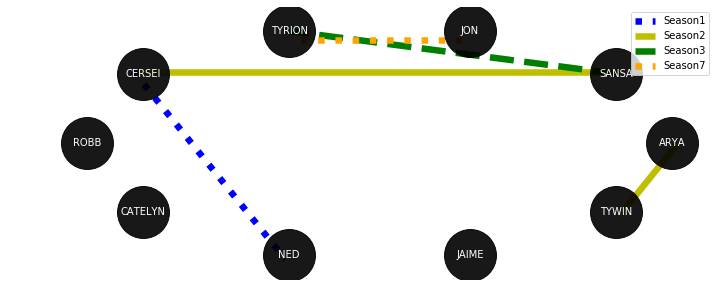

52.0 115.0 73.0


In [67]:
sub3 = mg.subgraph(Main_Char)
weights3_1to7 = np.array([(d['weight']['weight']) for u,v,d in sub3.edges(data=True)])
p3_95 = np.floor(np.percentile(weights3_1to7 , 90))
#print(p95)
Poslist3= []
scale3=1
for i in range(7):
    posN3 = nx.shell_layout(sub3, scale=scale3)
    Poslist3.append(posN3)
    scale3-=.02
    #print(scale)
    
#pos2 = nx.shell_layout(sub, scale=1.1)
#pos3 = nx.shell_layout(sub, scale=1.2)


plt.figure(figsize=(12,5))
nx.draw_networkx_nodes(sub3, Poslist3[2], node_size=2700, node_shape='o', alpha=.9, node_color='black')
nx.draw_networkx_labels(sub3, Poslist3[2], font_size=10, font_color='w')
large3=[]
for i in range(7):
        elarge3 = [(u, v) for (u, v, d) in sub3.edges(data=True) if d['weight']['weight'] >=p3_95 and d['weight']['season']==str(i+1) and checkInteract(u,v)==3]
        
        #print(elarge3[0][1] , '--', elarge3)
        large3.append(elarge3)
[print(i) for  i in large3]
#print(large)
#elarge1 = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']=='1']
#elarge2 = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']=='2']
#elarge3 = [(u, v) for (u, v, d) in sub.edges(data=True) if d['weight']['weight'] >=p95 and d['weight']['season']=='3']
cs = [('b','dotted'),('y','solid') ,( 'g','dashed'), ('purple','dotted'), ('pink','dashed') , ('grey','solid'),('orange','dotted')]
for i in range(7):
    nx.draw_networkx_edges(sub3, Poslist3[i], edgelist=large3[i],width=6.5, alpha=1 ,label='Season'+str(i+1), edge_color=cs[i][0], style=cs[i][1])
#nx.draw_networkx_edges(sub, pos2, edgelist=large[1],width=3, alpha=1, edge_color='y', style='dotted')
#nx.draw_networkx_edges(sub, pos3, edgelist=large[2],width=3, alpha=1, edge_color=g', style='dashed')
plt.legend()

plt.axis('off')
plt.show()
print(p95 , p2_95 , p3_95)
#arge3


The Starks weigh down the top 10% for the Lannisters when combined to allow more character interactions to reach the top 10 percent.